# Pre-Processing & Exploratory Data Analysis

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

Patient Features:
- id: Unique patient identifier (int)
- gender: Patient's gender (str)
  - 'Male': Male
  - 'Female': Female
  - 'Other': Other/Unspecified
- age: Patient's age in years (float)
- hypertension: Hypertension status (int)
  - 0: No hypertension
  - 1: Has hypertension
- heart_disease: Presence of heart disease (int)
  - 0: No heart disease
  - 1: Has heart disease
- ever_married: Marital status (str)
  - 'Yes': Ever married
  - 'No': Never married
- work_type: Type of work (str)
  - 'Private': Private sector employment
  - 'Self-employed': Self-employed
  - 'Govt_job': Government job
  - 'children': Under working age
  - 'Never_worked': Never employed
- Residence_type: Residence area type (str)
  - 'Urban': Urban area
  - 'Rural': Rural area
- avg_glucose_level: Average glucose level in blood (mg/dL) (float)
- bmi: Body Mass Index (kg/m²) (float)
- smoking_status: Smoking history (str)
  - 'formerly smoked': Previously smoked but quit
  - 'never smoked': No smoking history
  - 'smokes': Current smoker
  - 'Unknown': Smoking status not available

Target Variable:
- stroke: Stroke occurrence (int)
  - 0: No stroke occurred
  - 1: Stroke occurred

Notes:
1. Missing values may exist in the bmi column (shown as NaN)
2. Age includes fractional years for very young patients
3. The dataset is imbalanced with fewer stroke cases (class 1)
4. Some categorical features have 'Unknown' categories
"""

In [ ]:
# Import the dataset
data = pd.read_csv("heart.csv")
df = data
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
display(df.head())
display(df.tail())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = df.dropna(subset=['bmi'])

# Reset index after dropping rows (optional)
df = df.reset_index(drop=True)


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
# Define columns
'''
The variable "class_cols" contains a list of the categorical features.
The variable "continuous_cols" contains a list of the features with continuous values.
The variable "target_col" contains the stroke column.
'''

categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type",
                    "Residence_type", "smoking_status"]
continuous_cols = ["age", "avg_glucose_level", "bmi"]
target_col = ["stroke"]


**Data Preprocessing and Analysis Workflow**

In this workflow, we will follow a systematic approach to understand and prepare our dataset for modeling. The key steps involved are as follows:

1. **Exploratory Data Analysis (EDA)**:
   - Conduct comprehensive EDA to uncover insights about the data.
   - Generate various visualizations (e.g., histograms, box plots, scatter plots) to get a better understanding of feature distributions, relationships, and potential outliers.

2. **Train-Test Split**:
   - Split the dataset into **training** and **testing** sets to evaluate model performance.
   - This ensures that the model is trained on one portion of the data and validated on an unseen portion to avoid **data leakage**.

3. **Scaling Continuous Features**:
   - Apply `StandardScaler` to the continuous features to standardize their values.
   - This transformation will center the data around a mean of `0` and scale it to have a standard deviation of `1`.

By following these steps, we aim to prepare our dataset effectively for modeling, ensuring that we maximize the model's performance and reliability.


## Exploratory Data Analysis Graphs

### Correlation Matrix

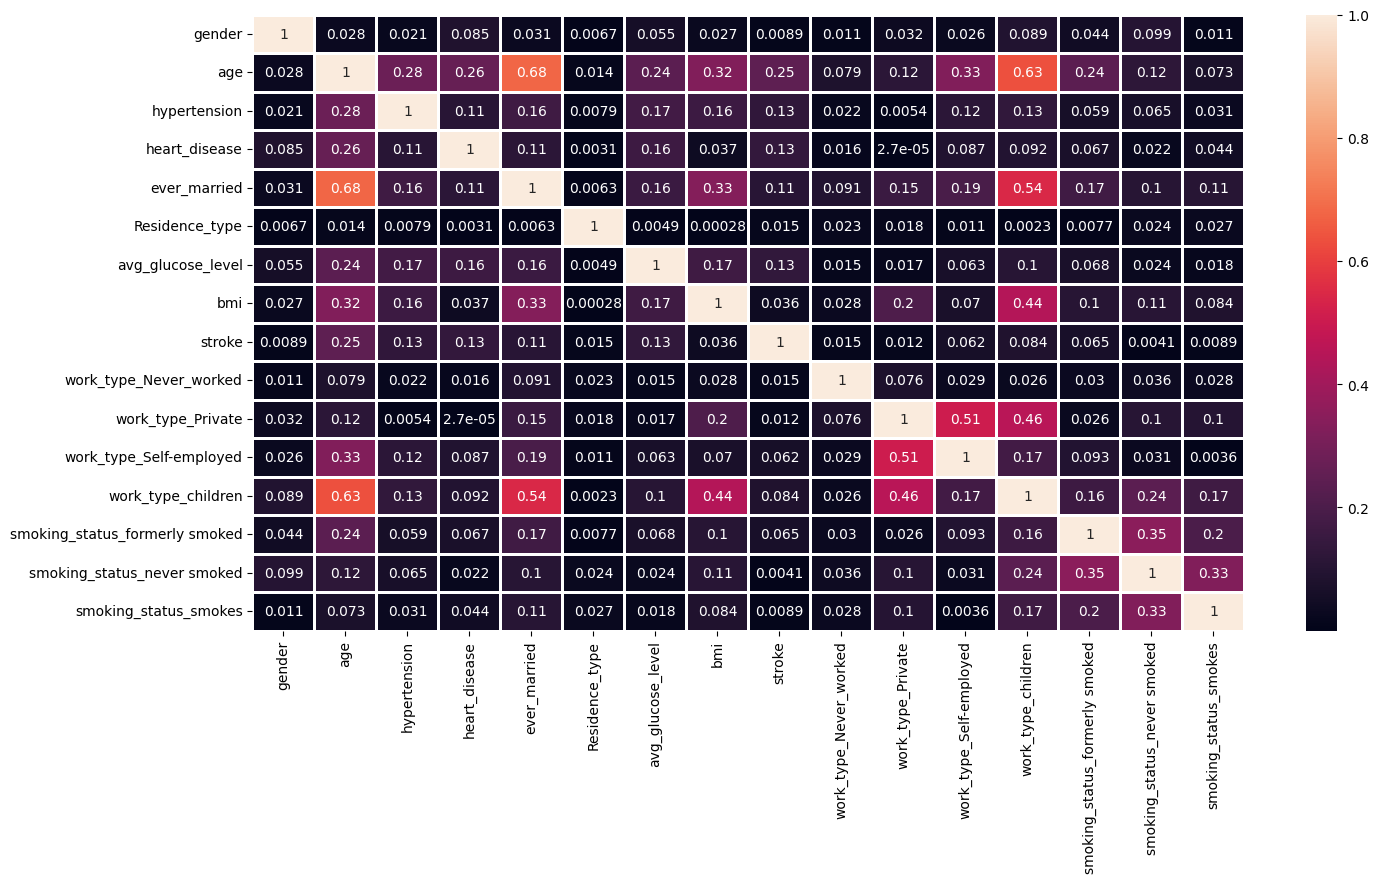

In [ ]:
# Correlation Matrix
plt.figure(figsize=(16,8))
correlation=df.corr()
sns.heatmap(abs(correlation),lw=1,annot=True)
plt.show()

### Histplots for the Continuous Features

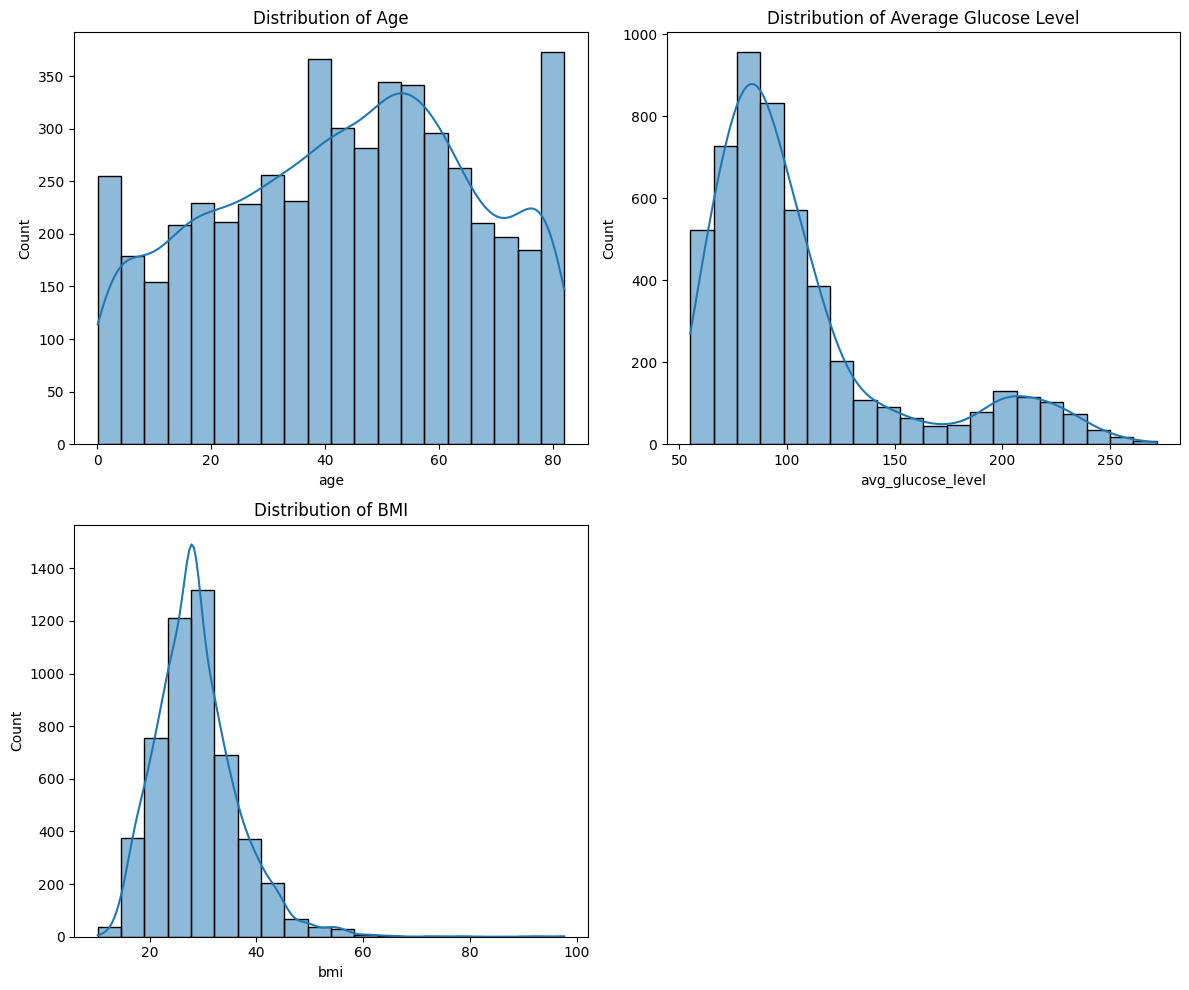

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create histplots for the Continuous Features
fig, ax = plt.subplots(2, 2, figsize=(12, 10))  # Adjusted grid to 2x2 for 4 features

# Plot distributions
sns.histplot(df['age'], bins=20, ax=ax[0, 0], kde=True)
ax[0, 0].set_title('Distribution of Age')

sns.histplot(df['avg_glucose_level'], bins=20, ax=ax[0, 1], kde=True)
ax[0, 1].set_title('Distribution of Average Glucose Level')

sns.histplot(df['bmi'], bins=20, ax=ax[1, 0], kde=True)
ax[1, 0].set_title('Distribution of BMI')

# Since we have only 3 continuous features, turn off the last subplot
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()

### Distribution of the Continuous Features with respect to the Target Variable

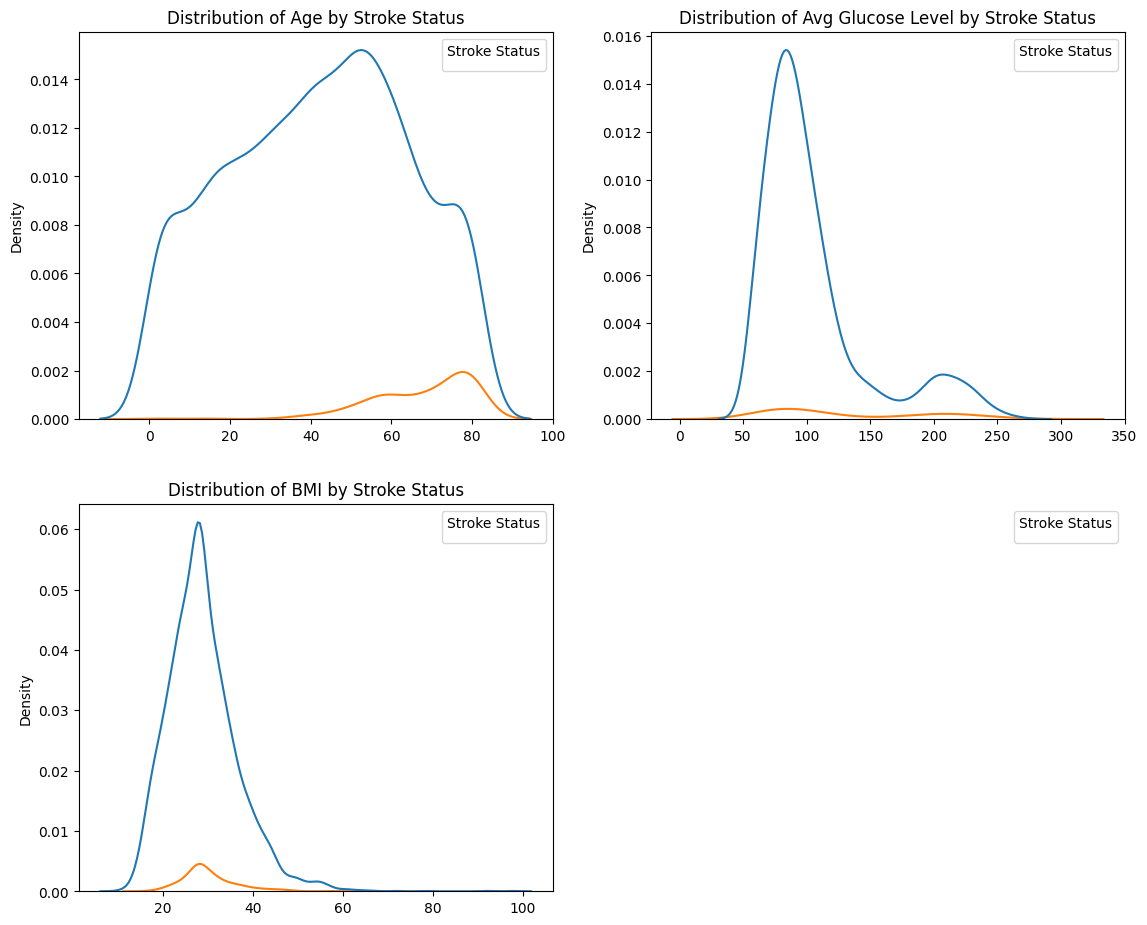

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with adjusted size
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

# Plot for 'age'
axes[0, 0].set_title("Distribution of Age by Stroke Status")
sns.kdeplot(data=df, x='age', hue='stroke', ax=axes[0, 0], palette=['#1f77b4', '#ff7f0e'])

# Plot for 'avg_glucose_level'
axes[0, 1].set_title("Distribution of Avg Glucose Level by Stroke Status")
sns.kdeplot(data=df, x='avg_glucose_level', hue='stroke', ax=axes[0, 1], palette=['#1f77b4', '#ff7f0e'])

# Plot for 'bmi'
axes[1, 0].set_title("Distribution of BMI by Stroke Status")
sns.kdeplot(data=df, x='bmi', hue='stroke', ax=axes[1, 0], palette=['#1f77b4', '#ff7f0e'])

# Since we only have 3 continuous features, turn off the last subplot
axes[1, 1].axis('off')

# Set labels and improve legend
for ax in axes.flat:
    if ax.get_visible():  # Only for visible plots
        ax.set_xlabel("")
        ax.set_ylabel("Density")
        # Improve legend
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles, ['No Stroke', 'Stroke'], title='Stroke Status')

plt.show()

### Plot for Categorical Features with respect to the Target Variable

<ipython-input-27-a53bb27f6c43>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='pastel')
<ipython-input-27-a53bb27f6c43>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(['Female', 'Male'])
<ipython-input-27-a53bb27f6c43>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, ax=axes[0, 1], palette='pastel')
<ipython-input-27-a53bb27f6c43>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['No', 'Yes

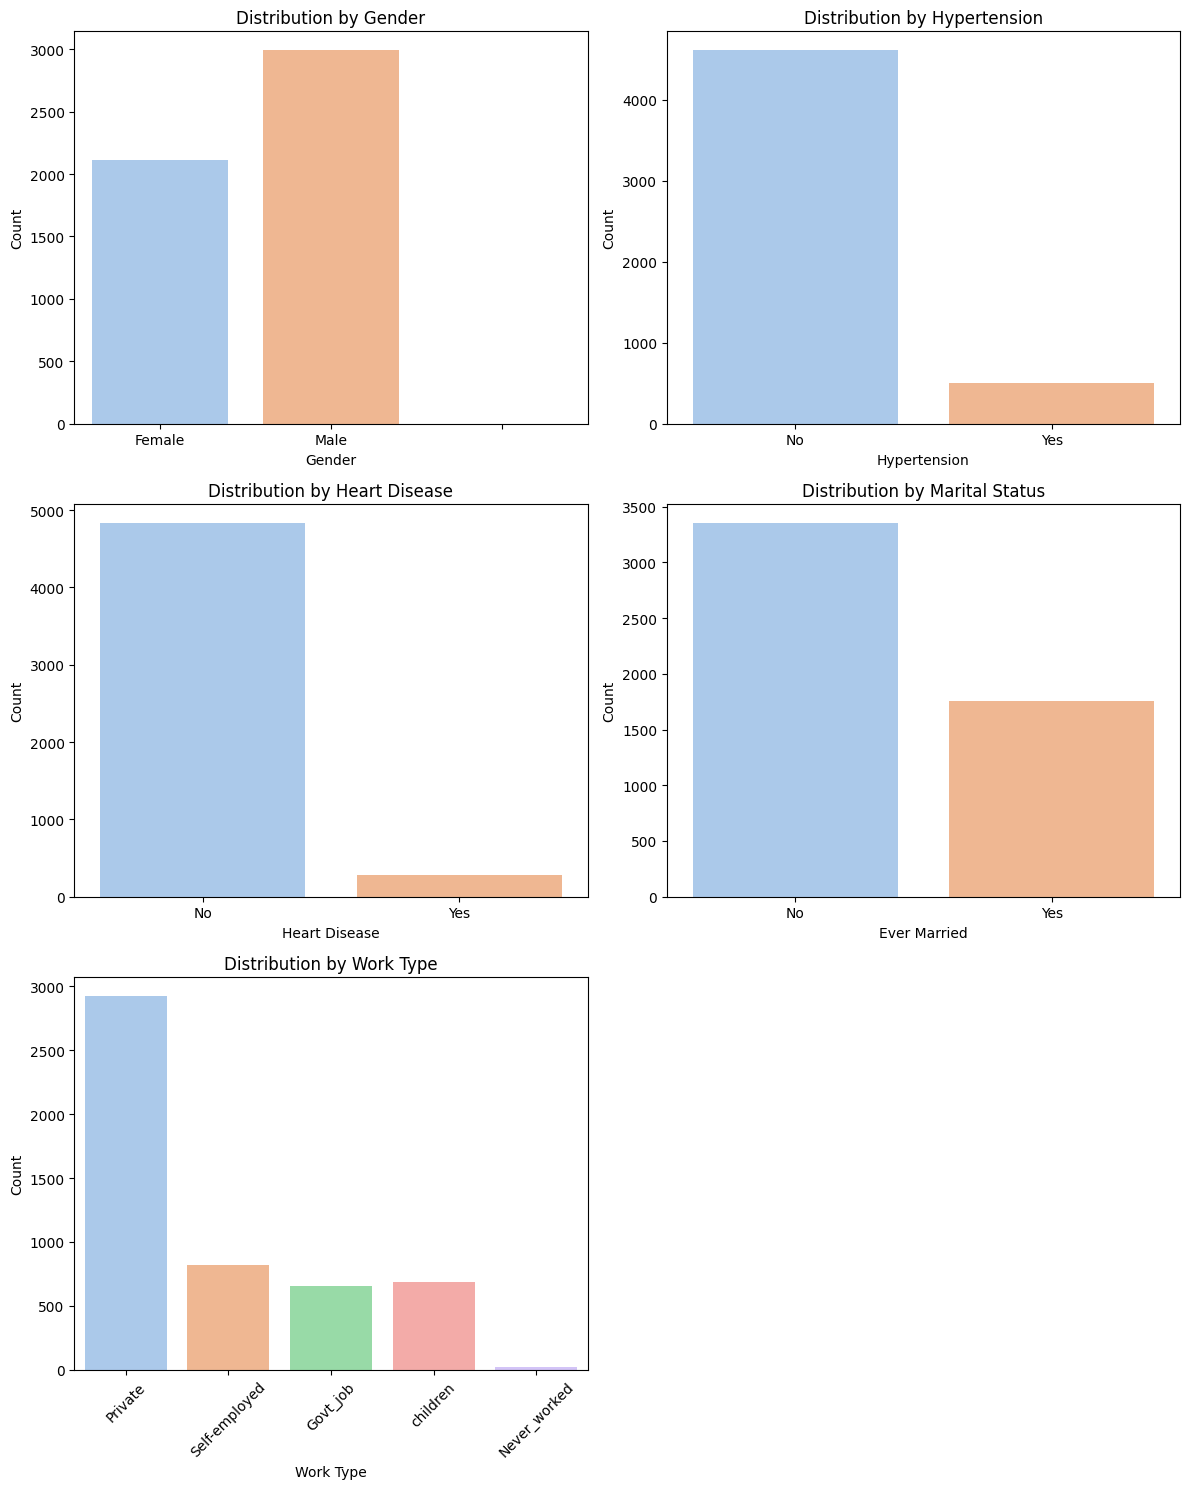

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('heart.csv')
# Create bar plots for Categorical Features
fig, axes = plt.subplots(3, 2, figsize=(12, 15))  # Adjusted grid to 3x2 for 5 features
fig.tight_layout(pad=3.0)

# Plot for 'gender'
sns.countplot(x='gender', data=df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution by Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_xticklabels(['Female', 'Male'])

# Plot for 'hypertension'
sns.countplot(x='hypertension', data=df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Distribution by Hypertension')
axes[0, 1].set_xlabel('Hypertension')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticklabels(['No', 'Yes'])

# Plot for 'heart_disease'
sns.countplot(x='heart_disease', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Distribution by Heart Disease')
axes[1, 0].set_xlabel('Heart Disease')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_xticklabels(['No', 'Yes'])

# Plot for 'ever_married'
sns.countplot(x='ever_married', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Distribution by Marital Status')
axes[1, 1].set_xlabel('Ever Married')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_xticklabels(['No', 'Yes'])

# Plot for 'work_type'
sns.countplot(x='work_type', data=df, ax=axes[2, 0], palette='pastel')
axes[2, 0].set_title('Distribution by Work Type')
axes[2, 0].set_xlabel('Work Type')
axes[2, 0].set_ylabel('Count')
axes[2, 0].tick_params(axis='x', rotation=45)

# Turn off the last empty subplot
axes[2, 1].axis('off')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

### Boxplots

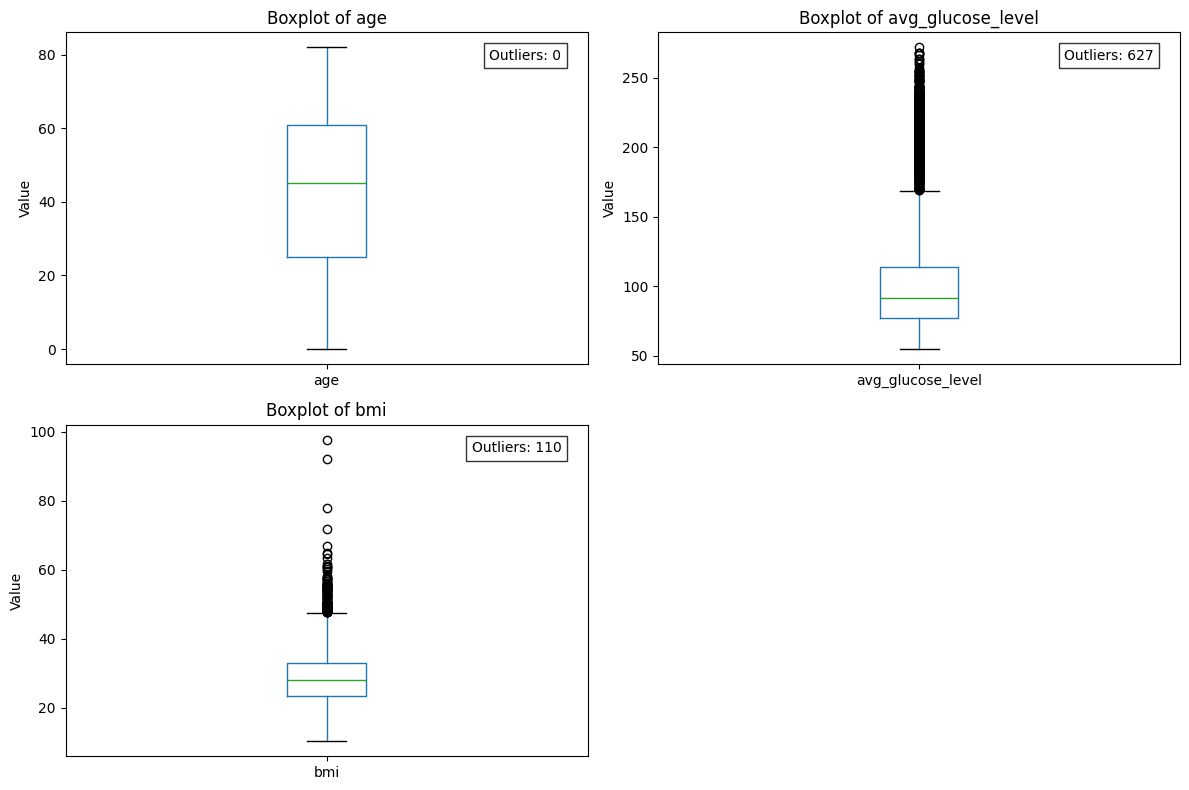

In [ ]:
import matplotlib.pyplot as plt

# Define the continuous features in your stroke dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Create figure with appropriate size (adjust rows based on number of features)
plt.figure(figsize=(12, 8))

# Plot each continuous feature
for i, feature in enumerate(continuous_features, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid
    df.boxplot(column=feature, grid=False)
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Value')

    # Calculate and display outlier count
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 - q1
    outlier_count = ((df[feature] < (q1 - 1.5*iqr)) | (df[feature] > (q3 + 1.5*iqr))).sum()
    plt.text(0.95, 0.95, f'Outliers: {outlier_count}',
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
if len(continuous_features) < 4:
    for j in range(len(continuous_features)+1, 5):
        plt.subplot(2, 2, j)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Remove Outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter values within the IQR range
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of continuous features in your stroke dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Initialize cleaned dataframe
df_cleaned = df.copy()

# Remove outliers for each continuous feature
for feature in continuous_features:
    print(f"Before removing {feature} outliers: {len(df_cleaned)} rows")
    df_cleaned = remove_outliers_iqr(df_cleaned, feature)
    print(f"After removing {feature} outliers: {len(df_cleaned)} rows\n")

# Show the difference in dataset size
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Rows removed: {len(df) - len(df_cleaned)} ({(len(df) - len(df_cleaned))/len(df)*100:.2f}%)")

Before removing age outliers: 5110 rows
After removing age outliers: 5110 rows

Before removing avg_glucose_level outliers: 5110 rows
After removing avg_glucose_level outliers: 4483 rows

Before removing bmi outliers: 4483 rows
After removing bmi outliers: 4253 rows

Original dataset size: 5110
Cleaned dataset size: 4253
Rows removed: 857 (16.77%)


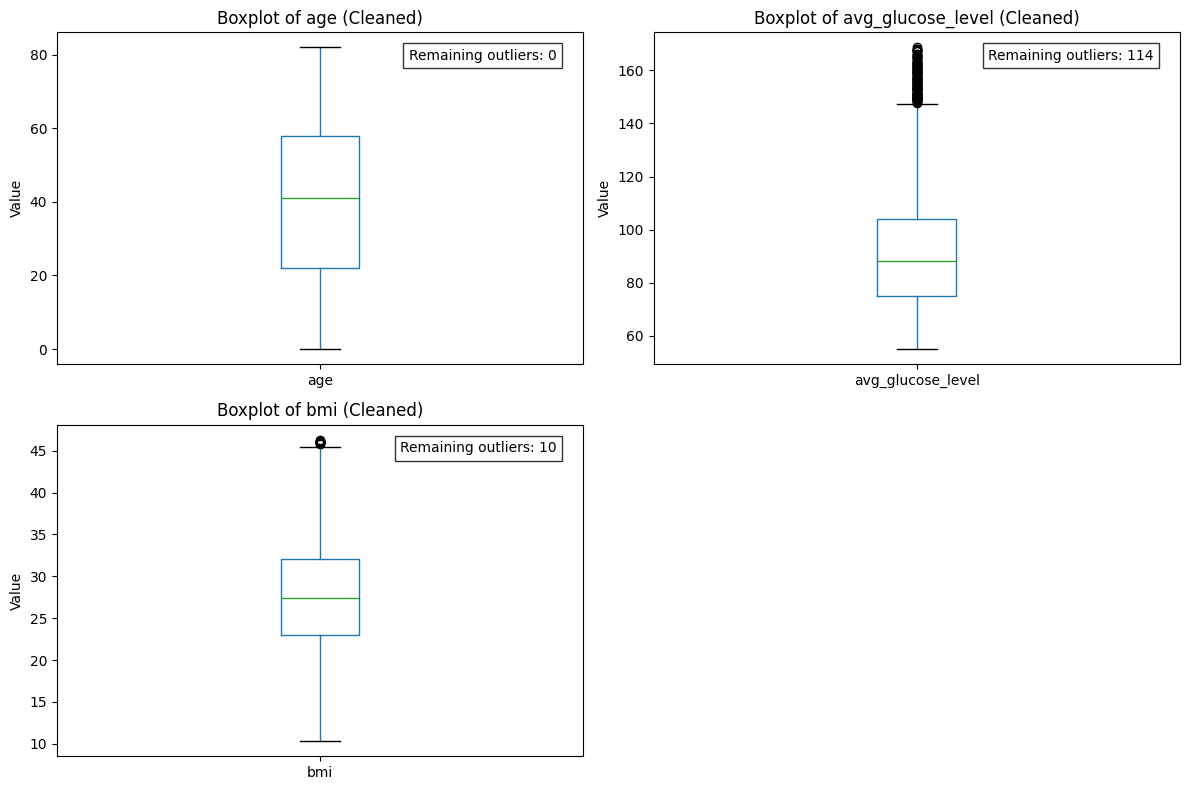

In [ ]:
import matplotlib.pyplot as plt

# Define the continuous features in your cleaned dataset
continuous_features = ['age', 'avg_glucose_level', 'bmi']

# Create figure with appropriate size (adjust rows based on number of features)
plt.figure(figsize=(12, 8))

# Plot each continuous feature
for i, feature in enumerate(continuous_features, start=1):
    plt.subplot(2, 2, i)  # 2x2 grid (will leave one empty)
    df_cleaned.boxplot(column=feature, grid=False)
    plt.title(f'Boxplot of {feature} (Cleaned)')
    plt.ylabel('Value')

    # Calculate and display remaining outlier count (if any)
    q1 = df_cleaned[feature].quantile(0.25)
    q3 = df_cleaned[feature].quantile(0.75)
    iqr = q3 - q1
    outlier_count = ((df_cleaned[feature] < (q1 - 1.5*iqr)) |
                    (df_cleaned[feature] > (q3 + 1.5*iqr))).sum()
    plt.text(0.95, 0.95, f'Remaining outliers: {outlier_count}',
             ha='right', va='top', transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for j in range(len(continuous_features)+1, 5):
    plt.subplot(2, 2, j)
    plt.axis('off')

plt.tight_layout()
plt.show()



## Pre-Processing the Data
The following steps will be performed :
- Splitting the data into test and train data.
- Scaling the Continuous Features

We shall now perform the train-test splitting of the dataset.

In [ ]:
categorical_cols = ["gender", "hypertension", "heart_disease", "ever_married", "work_type",
                    "Residence_type", "smoking_status"]
continuous_cols = ["age", "avg_glucose_level", "bmi"]
target_col = ["stroke"]

### Train/Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the dataset
df = pd.read_csv('heart.csv')

# Drop 'id' column as it's not useful for modeling
df = df.drop('id', axis=1)

# Handle missing values in 'bmi' (fill with median)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Encode categorical columns
# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
binary_cols = ['gender', 'ever_married', 'Residence_type']
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-category columns
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Split into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,  # for reproducibility
    stratify=y  # maintain class distribution in splits
)

# Print shapes to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nClass distribution in full dataset:\n", y.value_counts(normalize=True))
print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test set:\n", y_test.value_counts(normalize=True))

Training set shape: (3832, 15)
Test set shape: (1278, 15)

Class distribution in full dataset:
 stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

Class distribution in training set:
 stroke
0    0.9512
1    0.0488
Name: proportion, dtype: float64

Class distribution in test set:
 stroke
0    0.951487
1    0.048513
Name: proportion, dtype: float64


### Scaling the Continuous Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale in the training set
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])

# Scale in the test set
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
837,0,-0.191092,0,0,0,1,-0.589808,-0.797830,False,False,False,False,False,True,False
2899,1,0.517940,0,0,1,1,-0.827422,-0.240480,False,True,False,False,False,True,False
708,0,0.695198,0,0,1,1,3.008316,1.950034,False,True,False,False,True,False,False
3144,0,1.581487,0,0,0,0,-0.531129,0.200215,False,False,True,False,False,False,False
4920,0,1.404229,0,0,1,0,-0.836569,0.640910,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0,0.074795,0,0,1,1,-0.290392,0.809411,False,True,False,False,True,False,False
461,0,-1.210324,0,0,0,0,0.169442,-1.212602,False,False,False,True,False,False,False
1052,0,0.783827,0,0,1,0,-0.607433,0.951989,False,True,False,False,True,False,False
1757,1,-0.545607,0,0,1,1,-0.710065,-0.370096,False,True,False,False,False,False,False


# Implementations of various ML Models

In [ ]:
# To suppress the unwanted warnings
import warnings
warnings.filterwarnings("ignore")

''' For each model's output, we will be implementing printing the classification report, AUC/ROC Curve in addition to the accuracy score'''
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize & train the model
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

# Prediction on the test data
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Logistic Regression is : {accuracy * 100:.4f}%")

The accuracy of Logistic Regression is : 87.3239%


We will plot the Confusion Matrix, AUC/ROC Curve & the Classification Report

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.83      0.97      0.90        40

    accuracy                           0.87        71
   macro avg       0.89      0.86      0.87        71
weighted avg       0.89      0.87      0.87        71



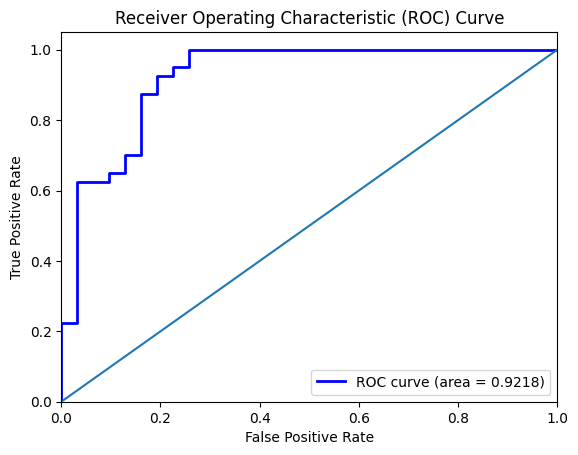

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve


# Ensure y_test is treated as a Series if it's a single-column DataFrame
if isinstance(y_test, pd.DataFrame) and y_test.shape[1] == 1:
    y_test = y_test.squeeze()


if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")
# Initialize & train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Prediction on Test Data
predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print(f"The accuracy of Gaussian Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Gaussian Naive Bayes model is: 37.3239%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51      1216
           1       0.07      0.98      0.13        62

    accuracy                           0.37      1278
   macro avg       0.53      0.66      0.32      1278
weighted avg       0.95      0.37      0.49      1278



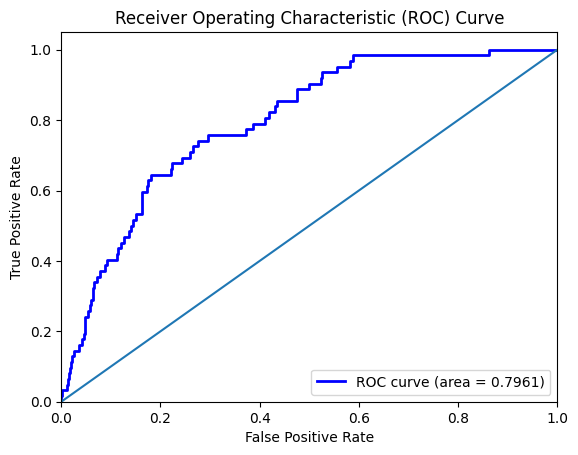

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score

# Classification Report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
import warnings
warnings.filterwarnings("ignore")

# Initialize & train the model
model = BernoulliNB()
model.fit(X_train, y_train)

# Prediction on Test Data
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Bernoulli Naive Bayes model is: {accuracy * 100:.4f}%")

The accuracy of Bernoulli Naive Bayes model is: 93.5837%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.34      0.51      1216
           1       0.07      0.98      0.13        62

    accuracy                           0.37      1278
   macro avg       0.53      0.66      0.32      1278
weighted avg       0.95      0.37      0.49      1278



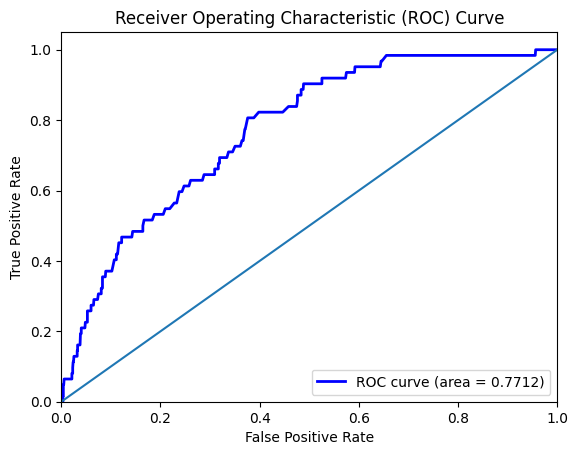

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, predicted))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],  # Include all kernel types
    'gamma': ['scale', 'auto']  # Gamma values
}

# Initialize GridSearchCV with SVC
grid_search = GridSearchCV(SVC(probability=True), param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_ * 100:.4f}%")

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Prediction on the Test Data
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of SVM with optimal hyperparameters is: {accuracy * 100:.4f}%")


Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Accuracy: 82.6467%
The accuracy of SVM with optimal hyperparameters is: 85.9155%


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        31
           1       0.80      1.00      0.89        40

    accuracy                           0.86        71
   macro avg       0.90      0.84      0.85        71
weighted avg       0.89      0.86      0.85        71



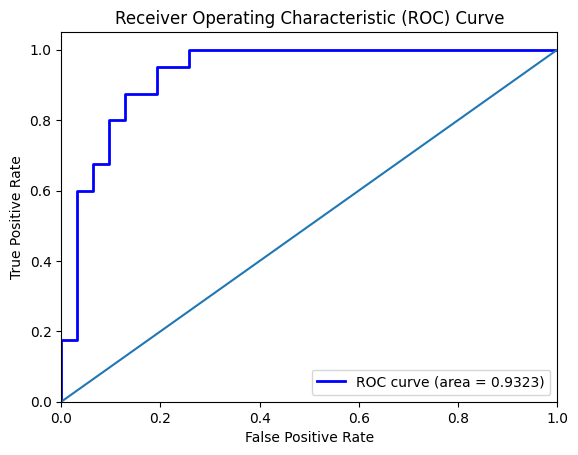

In [ ]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],        # Split criteria
    'max_depth': [None, 10, 20, 30, 40, 50], # Depth of the tree
    'min_samples_split': [2, 10, 20],        # Min samples to split a node
    'min_samples_leaf': [1, 5, 10]           # Min samples at a leaf node
}

# Initialize the model
dt_classifier = DecisionTreeClassifier(random_state=0)

# Find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_dt_classifier = grid_search.best_estimator_

# Train the classifier on the training set
best_dt_classifier.fit(X_train, y_train)

# Predictiction on the test set
y_pred = best_dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of Decision Tree: {accuracy * 100:.4f}%")

The accuracy of Decision Tree: 94.3662%



Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.19      0.05      0.08        62

    accuracy                           0.94      1278
   macro avg       0.57      0.52      0.52      1278
weighted avg       0.92      0.94      0.93      1278



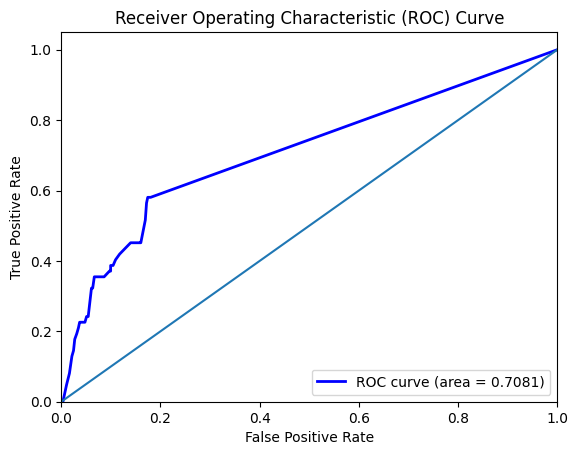

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = best_dt_classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Implementing the KNN model

# Consider n_neighbours = 5 initially.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Use the model on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of KNN: {accuracy * 100:.4f}%")

The accuracy of KNN: 94.2097%



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.90      0.94      0.92      1278



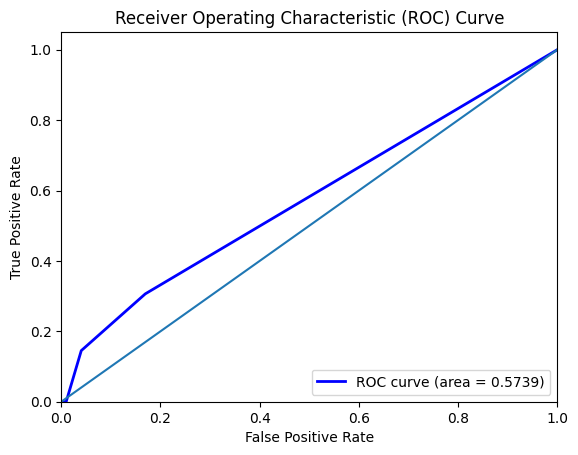

In [ ]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# AUC/ROC Curve

if len(y_test.unique()) == 2:
    y_proba = knn.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1])  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


## Multi-Layer Perceptron

Epoch [10/100], Loss: 0.5994
Epoch [20/100], Loss: 0.6726
Epoch [30/100], Loss: 0.3745
Epoch [40/100], Loss: 0.6872
Epoch [50/100], Loss: 0.3302
Epoch [60/100], Loss: 0.3905
Epoch [70/100], Loss: 0.7234
Epoch [80/100], Loss: 0.3149
Epoch [90/100], Loss: 0.4195
Epoch [100/100], Loss: 0.3313
Accuracy: 85.92%


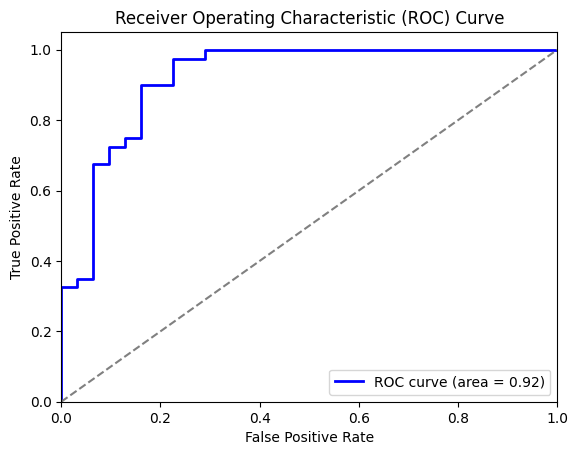


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.84      0.93      0.88        40

    accuracy                           0.86        71
   macro avg       0.86      0.85      0.85        71
weighted avg       0.86      0.86      0.86        71



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define the PyTorch model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(13, 16)  # Input layer
        self.dropout1 = nn.Dropout(0.25)  # Dropout layer
        self.fc2 = nn.Linear(16, 8)  # Hidden layer
        self.dropout2 = nn.Dropout(0.25)  # Dropout layer
        self.fc3 = nn.Linear(8, 2)  # Output layer (2 classes)
        self.relu = nn.ReLU()  # ReLU activation
        self.softmax = nn.Softmax(dim=1)  # Softmax activation for multi-class output

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return self.softmax(x)

# Create the model
model = MLP()

# Specify loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for multi-class classification
optimizer = optim.RMSprop(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors (Assuming X_train and y_train are your training data)
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # Ensure X_train is a DataFrame
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)  # Convert Series to NumPy and then to tensor

# Create Dataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Training the model
num_epochs = 100
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for features, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        labels = labels.view(-1)
        outputs = model(features)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)  # Ensure X_test is a DataFrame
    y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.long)  # Convert Series to NumPy and then to tensor

    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

    correct = 0
    total = 0
    all_preds = []
    all_labels = []

    for features, labels in test_loader:
        outputs = model(features)  # Forward pass
        _, predicted = torch.max(outputs.data, 1)  # Get predicted class
        all_preds.append(outputs.numpy())  # Append the predicted probabilities
        all_labels.append(labels.numpy())  # Append the true labels
        total += labels.size(0)  # Count total samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

    accuracy = 100 * correct / total  # Calculate accuracy
    print(f'Accuracy: {accuracy:.2f}%')

# Convert predictions and labels to numpy arrays
all_preds = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(all_labels, all_preds[:, 1])  # Using probabilities of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(all_labels, np.argmax(all_preds, axis=1)))  # Use the predicted class labels
